In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pytry
import sys
sys.path.append('../model')
from blink_trial import BlinkTrial

In [51]:
data = BlinkTrial().run(n_granule=200, n_trials=500, seed=3924, learning_rate=0.001, tau=0.06,
                 mode='two_populations',
                 #mode='two_populations_dales_principle',
                 #mode='single_population',
                 data_dir='basic', verbose=False, data_format='npz'
                )

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

In [174]:
data = list(pytry.read('basic'))[-1]

In [175]:
dt = data['sample_every']
reflex_scale = 1.0/25
purk = np.array(data['purkinje']).reshape(-1, int(data['period']/dt)).T 

v = np.clip(purk[:,:],0,np.inf)*dt/reflex_scale
pos = np.cumsum(v, axis=0)
pos = np.minimum(pos, 1.0)

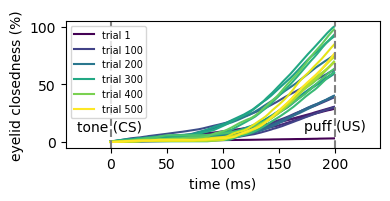

In [208]:
import matplotlib
cmap = matplotlib.cm.get_cmap("viridis")

plt.figure(figsize=(4, 2), dpi=100)
lines = []
plt.plot(pos[:200,0]*100, c=cmap(0), label='trial 1')
for i in range(19, pos.shape[1], 20):
    label = None
    if (i+1) % 100 == 0:
        label = 'trial %d' % (i+1)
    plt.plot(pos[:200,i]*100, c=cmap(i/pos.shape[1]), label=label)
    
plt.ylabel('eyelid closedness (%)')
plt.xlabel('time (ms)')
plt.xlim(-40, 240)
plt.legend(fontsize=7)
plt.axvline(200, ls='--', c=(0.5,0.5, 0.5))
plt.axvline(0, ls='--', c=(0.5,0.5, 0.5))
plt.text(-30, 10, 'tone (CS)')
plt.text(172, 10, 'puff (US)')
plt.tight_layout()
plt.savefig('result-basic-closedness.png', dpi=600)
plt.savefig('result-basic-closedness.pdf', dpi=600)
plt.show()

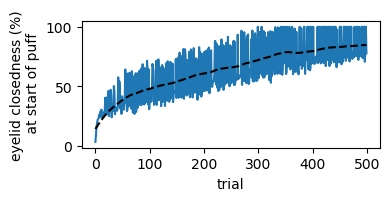

In [209]:
import nengo

plt.figure(figsize=(4, 2), dpi=100)

filt = nengo.synapses.Lowpass(20)
plt.plot(pos[200]*100)
plt.plot(filt.filtfilt(pos[200], dt=1)*100, c='k', ls='--')
plt.ylabel('eyelid closedness (%)\n at start of puff')
plt.xlabel('trial')
plt.tight_layout()
plt.savefig('result-basic-atpuff.png', dpi=600)
plt.savefig('result-basic-atpuff.pdf', dpi=600)
plt.show()

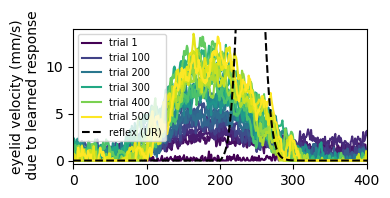

In [210]:
plt.figure(figsize=(4, 2), dpi=100)

scale = 1000
plt.plot(v[:,0]*scale, c=cmap(0/pos.shape[1]), label='trial 1')
for i in range(19, v.shape[1], 20):
    label = None
    if (i+1) % 100 == 0:
        label = 'trial %d' % (i+1)
    plt.plot(v[:,i]*scale, c=cmap(i/pos.shape[1]), label=label)
#plt.twinx()
plt.plot(data['reflex']*reflex_scale*scale, ls='--', c='k', label='reflex (UR)')
#plt.yticks([])
plt.legend(fontsize=7, loc='upper left')
plt.xlim(0, 400)
plt.ylim(-0.01*reflex_scale*scale, 0.35*reflex_scale*scale)
plt.ylabel('eyelid velocity (mm/s)\n due to learned response')
plt.tight_layout()
plt.savefig('result-basic-velocity.png', dpi=600)
plt.savefig('result-basic-velocity.pdf', dpi=600)

plt.show()

In [207]:
data['learning_rate']

0.001